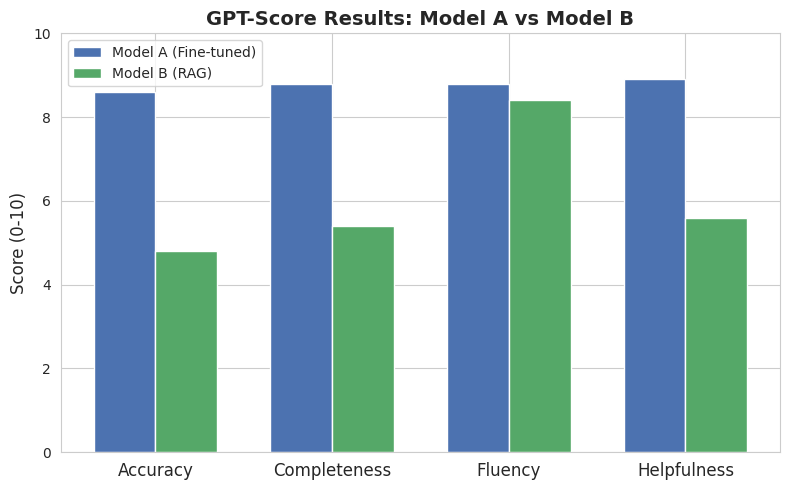

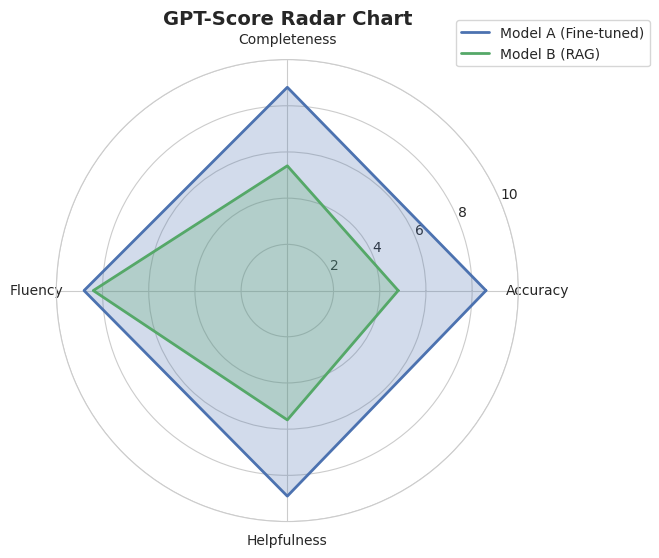

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 정의
categories = ["Accuracy", "Completeness", "Fluency", "Helpfulness"]
scores_A = [8.6, 8.8, 8.8, 8.9]   # Model A (Fine-tuned)
scores_B = [4.8, 5.4, 8.4, 5.6]   # Model B (RAG)

# ----------------------------
# 1) Bar Chart
# ----------------------------
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

bar1 = plt.bar(x - width/2, scores_A, width, label='Model A (Fine-tuned)', color='#4C72B0')
bar2 = plt.bar(x + width/2, scores_B, width, label='Model B (RAG)', color='#55A868')

plt.xticks(x, categories, fontsize=12)
plt.ylabel("Score (0-10)", fontsize=12)
plt.ylim(0, 10)
plt.title("GPT-Score Results: Model A vs Model B", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 2) Radar Chart
# ----------------------------
# Radar 차트를 위한 처리
labels = np.array(categories)
num_vars = len(labels)

# 각 축의 각도
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 모델 점수 연결
scores_A_radar = scores_A + scores_A[:1]
scores_B_radar = scores_B + scores_B[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

ax.plot(angles, scores_A_radar, color='#4C72B0', linewidth=2, label="Model A (Fine-tuned)")
ax.fill(angles, scores_A_radar, color='#4C72B0', alpha=0.25)

ax.plot(angles, scores_B_radar, color='#55A868', linewidth=2, label="Model B (RAG)")
ax.fill(angles, scores_B_radar, color='#55A868', alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 10)
ax.set_title("GPT-Score Radar Chart", weight='bold', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

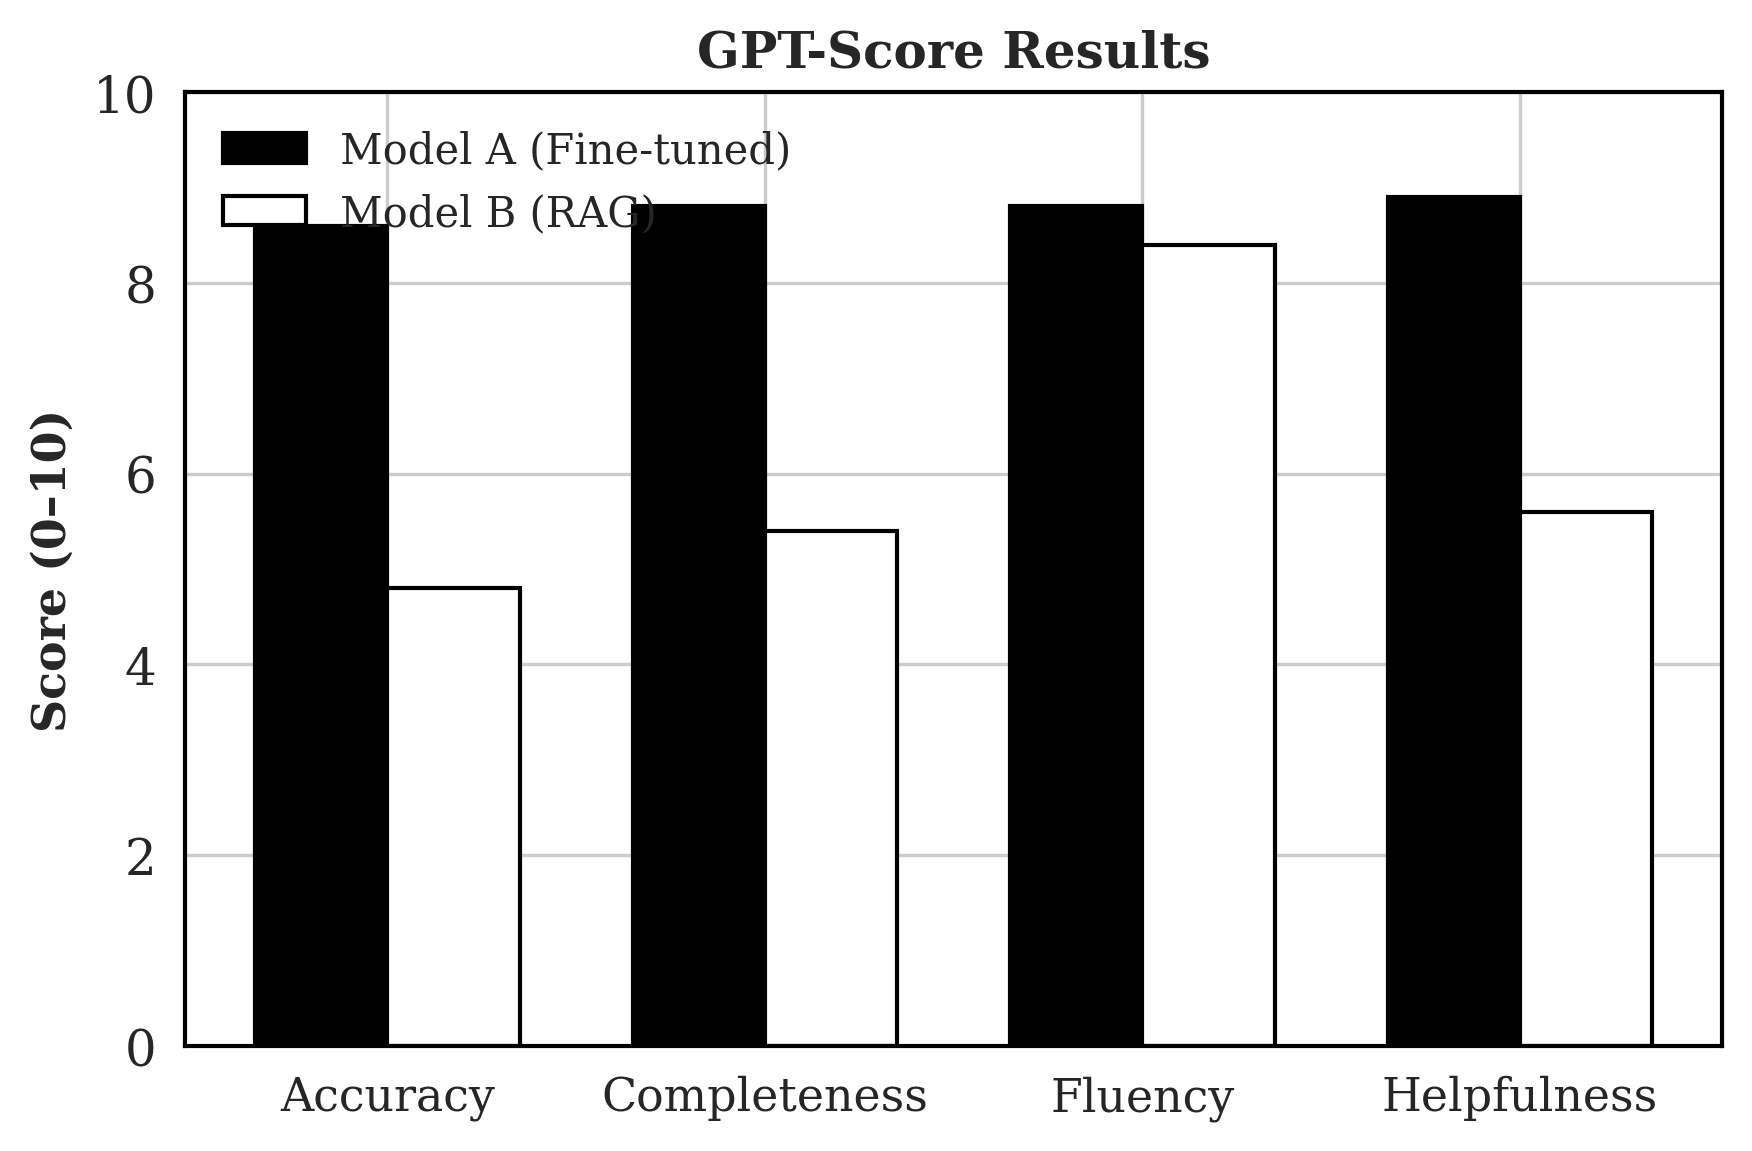

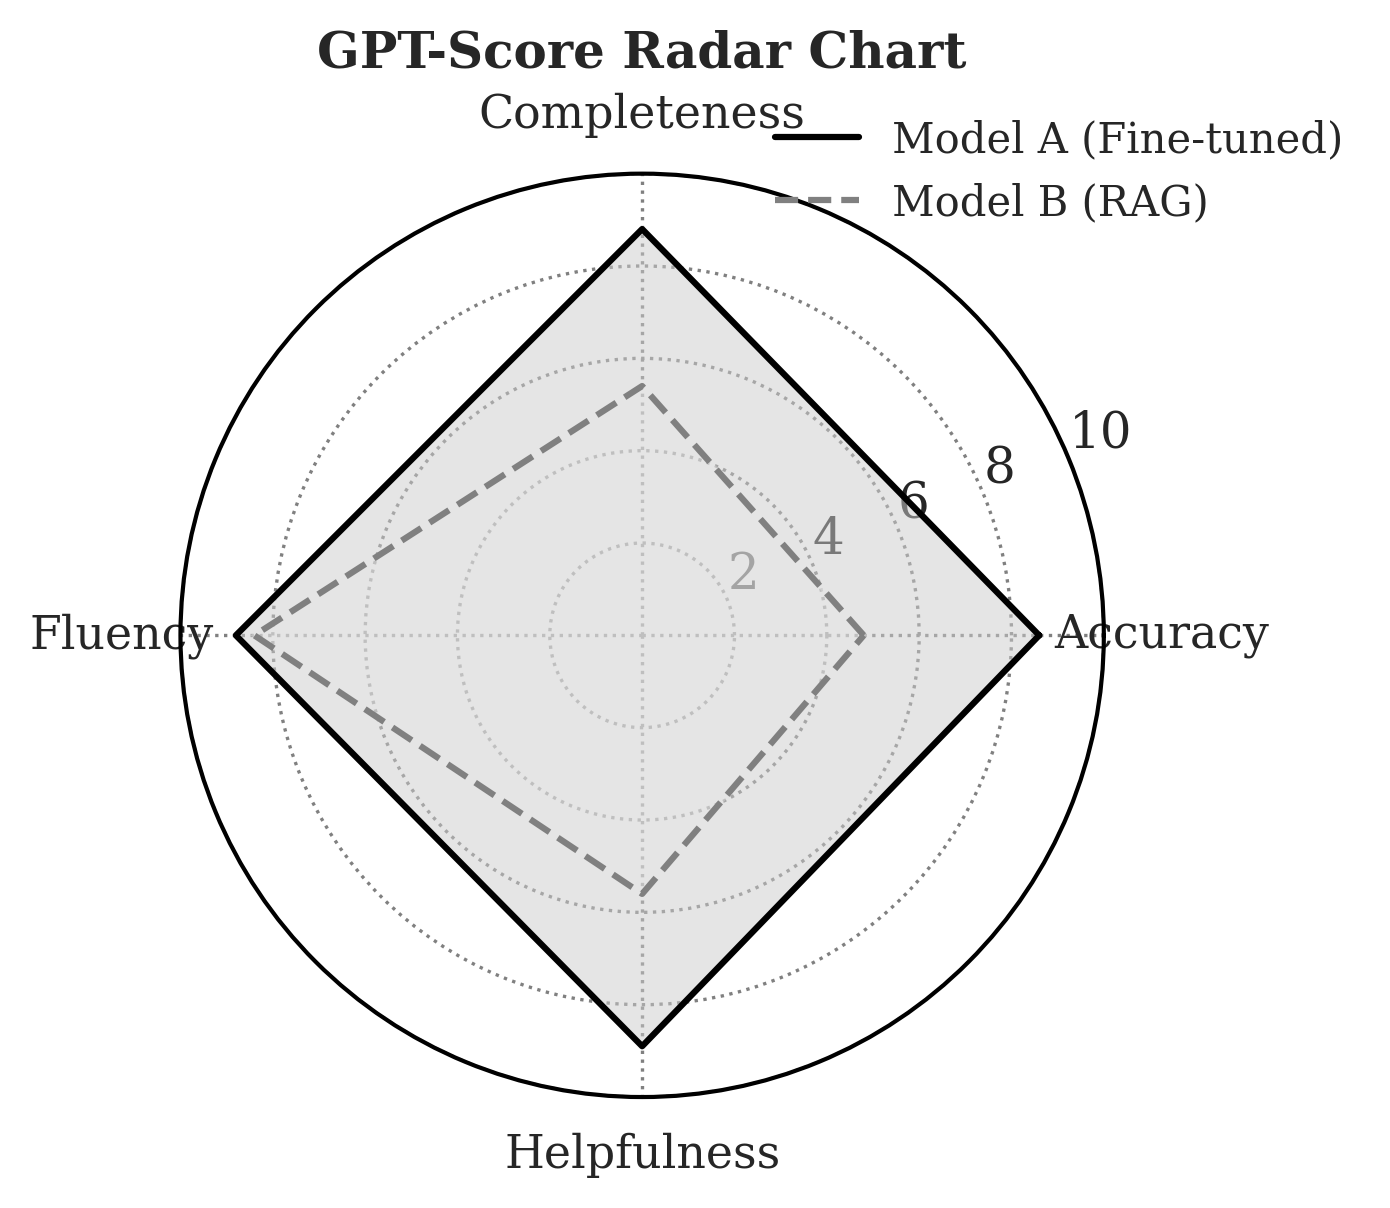

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# ----------------------------
# 스타일 설정 (ACM/IEEE 논문용)
# ----------------------------
rcParams['font.family'] = 'serif'   # Times 계열
rcParams['font.size'] = 12
rcParams['axes.edgecolor'] = 'black'
rcParams['axes.linewidth'] = 1.0
rcParams['axes.labelweight'] = 'bold'
rcParams['figure.dpi'] = 300

# 데이터 정의
categories = ["Accuracy", "Completeness", "Fluency", "Helpfulness"]
scores_A = [8.6, 8.8, 8.8, 8.9]   # Model A (Fine-tuned)
scores_B = [4.8, 5.4, 8.4, 5.6]   # Model B (RAG)

# ----------------------------
# 1) Bar Chart (ACM/IEEE 스타일)
# ----------------------------
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, scores_A, width, label='Model A (Fine-tuned)', 
        color='black', hatch='//', edgecolor='black')
plt.bar(x + width/2, scores_B, width, label='Model B (RAG)', 
        color='white', edgecolor='black')

plt.xticks(x, categories, fontsize=11)
plt.ylabel("Score (0–10)", fontsize=11, weight='bold')
plt.ylim(0, 10)
plt.title("GPT-Score Results", fontsize=12, weight='bold')
plt.legend(frameon=False, fontsize=10)
plt.tight_layout()
plt.show()

# ----------------------------
# 2) Radar Chart (ACM/IEEE 스타일)
# ----------------------------
labels = np.array(categories)
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

scores_A_radar = scores_A + scores_A[:1]
scores_B_radar = scores_B + scores_B[:1]

fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(polar=True))

ax.plot(angles, scores_A_radar, color='black', linewidth=1.5, label="Model A (Fine-tuned)")
ax.fill(angles, scores_A_radar, color='0.8', alpha=0.5)

ax.plot(angles, scores_B_radar, color='gray', linewidth=1.5, linestyle='--', label="Model B (RAG)")
ax.fill(angles, scores_B_radar, color='0.9', alpha=0.4)

ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
ax.set_ylim(0, 10)
ax.set_title("GPT-Score Radar Chart", weight='bold', size=12, position=(0.5,1.1))
ax.grid(color="gray", linestyle=":", linewidth=0.8)
ax.spines['polar'].set_color('black')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=False, fontsize=10)

plt.tight_layout()
plt.show()

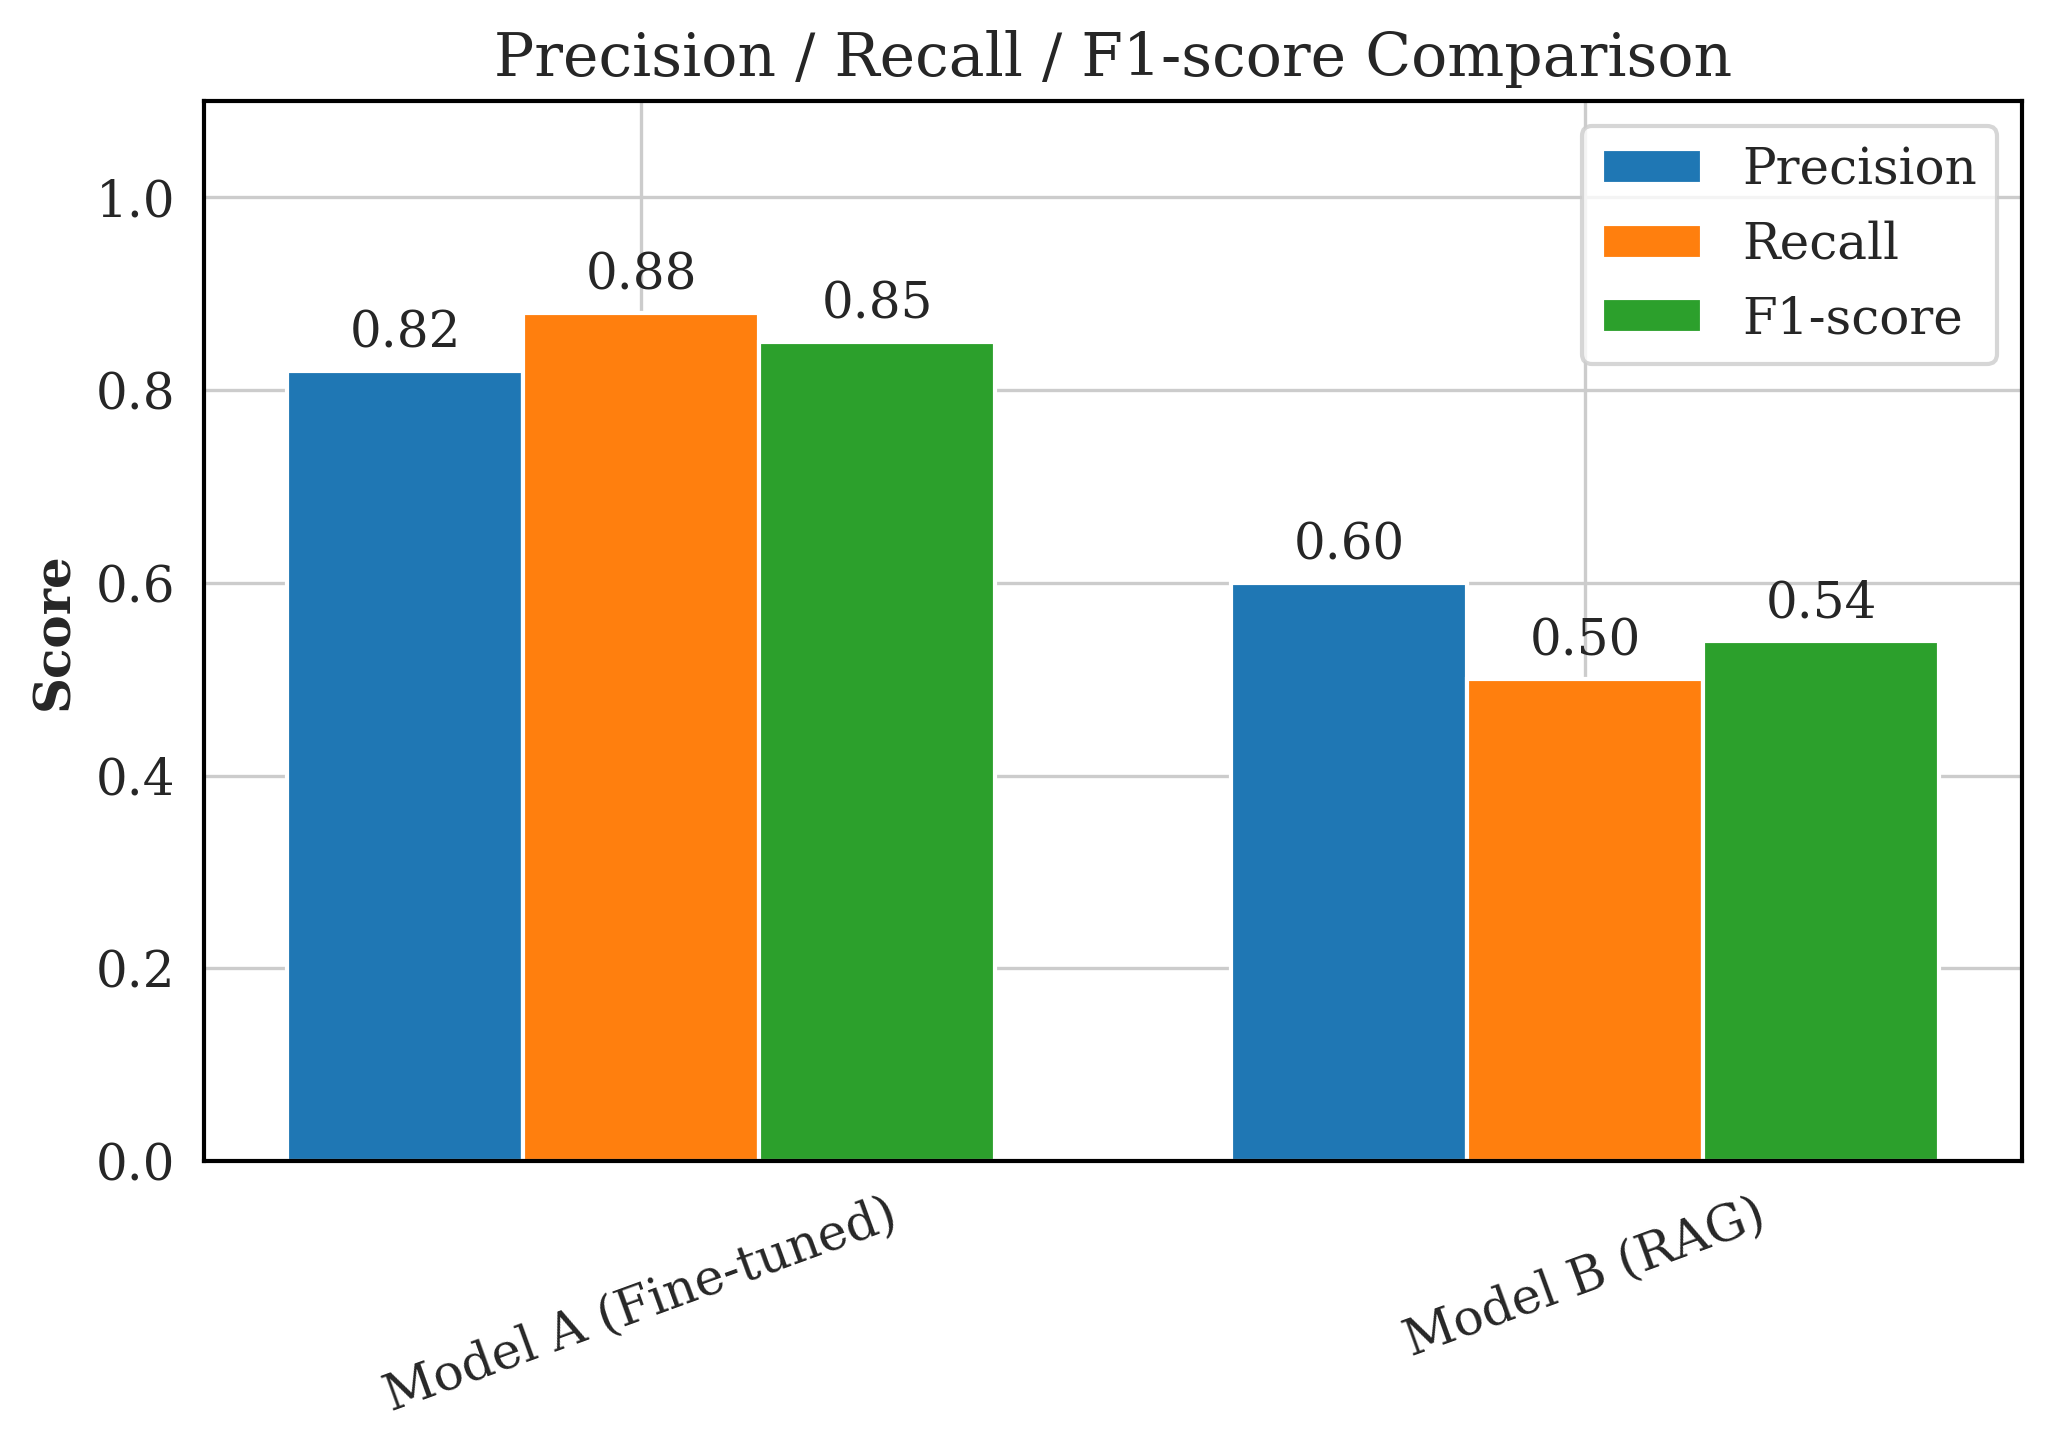

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 모델별 Precision, Recall, F1 값 (앞서 분석한 근사치)
models = ["Model A (Fine-tuned)", "Model B (RAG)"]
precision = [0.82, 0.60]
recall = [0.88, 0.50]
f1 = [0.85, 0.54]

x = np.arange(len(models))
width = 0.25  # 막대 폭

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

# y축 범위와 라벨링
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score')
ax.set_title('Precision / Recall / F1-score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.legend()

# 막대 위에 값 표시
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3), textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()